In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [12]:
epsilon=1e-4

In [21]:
def sigmoid_derivative(z):
    return (sigmoid(z+epsilon)-sigmoid(z-epsilon))/(2*epsilon)

In [ ]:
# neural network type
# 2->2->1 

In [179]:
def hypothesis(x,theta1,theta2):
#     global z2,a2,z3,a3
    x=np.concatenate((np.array([[1]]),x))
    z2=theta1.dot(x)
    a2=np.array(sigmoid(z2))
    a2=np.concatenate((np.array([[1]]),a2))
    z3= theta2.dot(a2)
    a3=np.array(sigmoid(z3))
    return a3
    
    
    

In [344]:
def cost(predictions,y):
    cost=0 
    cost-=(float(y)*(np.log(float(predictions)))+(1-float(y))*(np.log(1-float(predictions))))
    return cost
        

In [189]:
def costfun(X,Y,theta1,theta2):
    sum=0
    m=len(Y)
    
    for i in range(0,m):
        predictions=hypothesis(X[i].reshape(2,1),theta1,theta2)
        sum+=cost(predictions,Y[i])
    return sum/m
        

In [470]:
def derivative(X,Y,theta1,theta2):
    m=len(Y)
    bigdelta1=np.zeros(theta1.shape)
    bigdelta2=np.zeros(theta2.shape)
    for i in range(0,m):
        x=X[i].reshape(2,1)
        y=Y[i].reshape(1,1)
        x=np.concatenate((np.array([[1]]),x))
        z2=np.dot(theta1,x)
        a2=np.array(sigmoid(z2))
        a2=np.concatenate((np.array([[1]]),a2))
        z3= np.dot(theta2,a2)
        a3=np.array(sigmoid(z3))
        predictions=a3
        delta3=predictions-Y[i]
        delta2=((theta2.T[1:]).dot(delta3))*(a2[1:]*(np.array([[1],[1]])-a2[1:]))
        bigdelta1+=delta2.dot(x.T)
        bigdelta2+=delta3.dot(a2.T)
    D1=bigdelta1/m
    D2=bigdelta2/m
#     print(D1)
#     print(D2)
    return (D1,D2)
        
#         np.array(sigmoid_derivative(z2))

In [568]:
def derivative_by_limit(X,Y,theta1,theta2):
    D1=np.zeros(theta1.shape)
    for i in range(0,2):
        for j in range(0,3):
            temp1=theta1.copy()
            temp1[i][j]=theta1[i][j]+epsilon
#             print(temp1)
            temp2=theta1.copy()
            temp2[i][j]=theta1[i][j]-epsilon
            sum1=0
            sum2=0
            sum1=costfun(X,Y,temp1,theta2)
            sum2=costfun(X,Y,temp2,theta2)
            D1[i][j]=(sum1-sum2)/(2*epsilon)
    D2=np.zeros(theta2.shape)
    for i in range(0,1):
        for j in range(0,3):
            temp1=theta2.copy()
            temp1[i][j]=theta2[i][j]+epsilon
            temp2=theta2.copy()
            temp2[i][j]=theta2[i][j]-epsilon
            sum1=0
            sum2=0
            sum1=costfun(X,Y,theta1,temp1)
            sum2=costfun(X,Y,theta1,temp2)
            D2[i][j]=(sum1-sum2)/(2*epsilon)
    return (D1,D2)

In [677]:
def neural_network(X,Y,iterations):
    alpha=0.1
    theta1=np.random.randn(2,3)*0.01
    theta2=np.random.randn(1,3)*0.01
#     theta1=np.array([[-25,20,20],[10,-20,-20]])
#     theta2=np.array([[-10,20,20]])
    jprev=float(costfun(X,Y,theta1,theta2)) 
    print(jprev)
    i=0
    list1=[]
    for i in range(iterations):
        D1,D2=derivative(X,Y,theta1,theta2)
        temp1=theta1-alpha*(D1)
        temp2=theta2-alpha*(D2)
        theta1=temp1
        theta2=temp2
        j=float(costfun(X,Y,theta1,theta2))*10
        if i%50==0:
            list1.append(j)
    return (theta1,theta2,list1)
        
#         print(jprev-j)
#         if(jprev-j<0.00001):
#             if jprev-j<0:
#                 print("ERROR",jprev-j)
#                 jprev=j
#             else:
#                 print("found at",jprev-j)
#                 break
#         else:
#             jprev=j
#     return (theta1,theta2)
        
        
    
    
    

In [575]:
df=pd.DataFrame()

In [576]:
df['a']=[1,0,1,0]

In [577]:
df['b']=[1,1,0,0]

In [578]:
df

,a,b
0,1,1
1,0,1
2,1,0
3,0,0


In [579]:
df['out']=[1,0,0,1]

In [605]:
df=pd.concat((df,df))

In [606]:
df.reset_index(inplace=True)

In [607]:
df.drop("index",axis=1,inplace=True)

In [608]:
df

,a,b,out
0,1,1,1
1,0,1,0
2,1,0,0
3,0,0,1
4,1,1,1
5,0,1,0
6,1,0,0
7,0,0,1
8,1,1,1
9,0,1,0


In [616]:
X=np.array(df.drop('out',axis=1))

In [617]:
X

array([[1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0]], dtype=int64)

In [611]:
Y=np.array(df['out'])

In [614]:
Y.reshape(32,1)

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1]], dtype=int64)

In [684]:
theta1,theta2,list1=neural_network(X,Y,10000)

5.0236546286154145


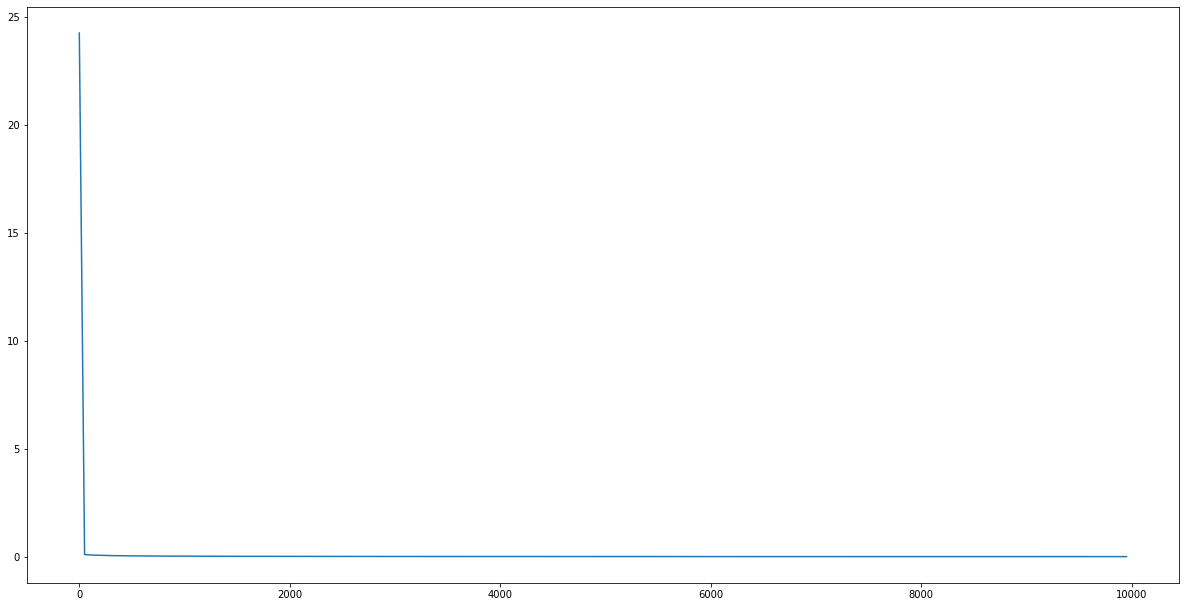

In [697]:
fig=plt.figure(figsize=(16,8))
axes=fig.add_axes([0,0,1,1])
axes.plot([i for i in range(0,10000,50)],theta2)

In [501]:
theta2


array([[-1.27679238,  0.75884074,  1.77438279]])

In [206]:
np.random.rand(2,3)

array([[0.72131253, 0.13409642, 0.6361304 ],
       [0.37884309, 0.06202974, 0.57977173]])

In [691]:
hypothesis(np.array([[1],[1]]),theta1,theta2)

array([[0.99790376]])

In [286]:
flower=pd.read_csv('IRIS.csv')

In [287]:
flower

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [292]:
for i in range(100,150):
    flower.drop(i,inplace=True)

In [293]:
flower

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [299]:
target=pd.get_dummies(flower["species"])

In [301]:
target.drop('Iris-versicolor',axis=1,inplace=True)

In [302]:
target

,Iris-setosa
0,1
1,1
2,1
3,1
4,1
...,...
95,0
96,0
97,0
98,0


In [308]:
flower=pd.concat((flower,target),axis=1)

In [311]:
flower.drop(['sepal_width','sepal_length','species'],axis=1,inplace=True)

In [312]:
flower

,petal_length,petal_width,Iris-setosa
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
95,4.2,1.2,0
96,4.2,1.3,0
97,4.3,1.3,0
98,3.0,1.1,0


In [321]:
X1=np.array(flower.drop('Iris-setosa',axis=1))

In [322]:
Y1=np.array(flower["Iris-setosa"])

In [323]:
Y1=Y1.reshape(100,1)

In [324]:
Y1

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [319]:
flower = flower.sample(frac=1).reset_index(drop=True)

In [320]:
flower

,petal_length,petal_width,Iris-setosa
0,3.7,1.0,0
1,1.4,0.2,1
2,3.6,1.3,0
3,1.6,0.2,1
4,1.6,0.4,1
...,...,...,...
95,1.7,0.2,1
96,3.9,1.1,0
97,1.5,0.2,1
98,1.5,0.2,1


In [695]:
list1,theta1,theta2=neural_network(X1,Y1,10000)

4.809564143370919


In [693]:
Y1

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [382]:
a=np.array([[1],[2],[3]])

In [385]:
a[1:]

array([[2],
       [3]])

In [420]:
# np.random.rand(1,100)*10

array([[0.31596497, 3.75576118, 9.69585859, 0.20262238, 2.58876317,
        5.22964505, 1.66714906, 0.9593794 , 6.30596555, 1.45313969,
        6.38504286, 8.7878484 , 2.79537187, 9.51050716, 9.19821081,
        3.87311234, 2.64552179, 4.8738799 , 6.24436719, 2.91510016,
        7.8420789 , 4.51819702, 7.1981098 , 3.82681678, 8.09880546,
        4.28531444, 9.43973011, 6.08909277, 6.02874275, 1.17076599,
        5.46981086, 7.59225136, 3.97831625, 1.97013225, 6.72104146,
        2.97236325, 3.87870201, 8.96202093, 8.95866904, 9.47542856,
        6.87243316, 6.41007041, 8.19169165, 6.22838954, 0.17726016,
        7.02423042, 6.76917236, 1.96738402, 5.04105695, 9.21025746,
        7.3194886 , 8.15022464, 8.68173252, 9.51136996, 5.8945056 ,
        2.50611838, 8.21391231, 6.48275719, 4.98107493, 2.01934572,
        0.81196703, 9.25753174, 1.29373917, 0.97167379, 3.70206535,
        3.43857834, 8.24766841, 9.68523777, 7.00383756, 3.84925369,
        9.9659122 , 1.52128627, 2.91245373, 3.53

In [435]:
a=np.array([1,2,3]).reshape(3,1)

In [436]:
b=np.array([1,2,3]).reshape(1,3)

In [441]:
a.dot(b)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [443]:
np.concatenate((np.array([[1]]),a))

array([[1],
       [1],
       [2],
       [3]])

In [449]:
float(np.log(np.array([[2.7139999]])))

0.998423524566693

In [452]:
X[0].reshape(2,1)


array([[1],
       [1]], dtype=int64)

In [502]:
np.random.seed(101)

In [541]:
theta1=np.random.randn(2,3)

In [542]:
theta2=np.random.randn(1,3)

In [543]:
derivative(X,Y,theta1,theta2)

(array([[-0.04209433, -0.01609462, -0.02298572],
        [-0.05864242, -0.0305085 , -0.02680441]]),
 array([[0.32133608, 0.11274605, 0.1710047 ]]))

In [544]:
derivative2(X,Y,theta1,theta2)

[[-1.13654459e+00  3.66479606e-04  1.02598415e+00]
 [-1.56597904e-01 -3.15791439e-02  6.49825833e-01]]
[[-1.13664459e+00  4.66479606e-04  1.02598415e+00]
 [-1.56597904e-01 -3.15791439e-02  6.49825833e-01]]
[[-1.13664459e+00  3.66479606e-04  1.02608415e+00]
 [-1.56597904e-01 -3.15791439e-02  6.49825833e-01]]
[[-1.13664459e+00  3.66479606e-04  1.02598415e+00]
 [-1.56497904e-01 -3.15791439e-02  6.49825833e-01]]
[[-1.13664459e+00  3.66479606e-04  1.02598415e+00]
 [-1.56597904e-01 -3.14791439e-02  6.49825833e-01]]
[[-1.13664459e+00  3.66479606e-04  1.02598415e+00]
 [-1.56597904e-01 -3.15791439e-02  6.49925833e-01]]


(array([[-0.04209433, -0.01609462, -0.02298572],
        [-0.05864242, -0.0305085 , -0.02680441]]),
 array([[0.32133608, 0.11274605, 0.1710047 ]]))

In [525]:
theta1

array([[0.86515928, 0.39052784, 0.16690464],
       [0.18450186, 0.80770591, 0.07295968]])

In [533]:
theta1[0][0]=1

In [534]:
theta1

array([[1.        , 0.39052784, 0.16690464],
       [0.18450186, 0.80770591, 0.07295968]])

In [532]:
a=theta1.copy()

In [624]:
theta1=np.array([[1,2,3],[4,5,6]])

In [621]:
a=np.array([[1],[2],[3]])

In [622]:
a

array([[1],
       [2],
       [3]])

In [625]:
theta1@a


array([[14],
       [32]])

In [630]:
a

array([[1],
       [2],
       [3]])

In [636]:
np.sum(theta1)

21

In [698]:
theta2=list1

In [712]:
hypothesis(np.array([[1.7],[0.2]]),list1,theta1)

array([[0.99975592]])

In [700]:
theta2

array([[ 1.38117907, -0.82725209, -0.77382523],
       [ 1.37946057, -0.81955638, -0.79618381]])

In [709]:
X1

array([[3.7, 1. ],
       [1.4, 0.2],
       [3.6, 1.3],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.3, 0.3],
       [4.1, 1.3],
       [4.3, 1.3],
       [3.5, 1. ],
       [1.3, 0.4],
       [1.9, 0.4],
       [4.8, 1.4],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.5, 0.4],
       [1.4, 0.2],
       [4.1, 1. ],
       [1.6, 0.2],
       [3.3, 1. ],
       [1.4, 0.2],
       [3.3, 1. ],
       [3.5, 1. ],
       [4.4, 1.3],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.6, 0.2],
       [1.3, 0.2],
       [4.1, 1.3],
       [4.7, 1.2],
       [4.8, 1.8],
       [4.5, 1.5],
       [4.9, 1.5],
       [1.5, 0.2],
       [4. , 1.3],
       [4.5, 1.5],
       [4.3, 1.3],
       [1.4, 0.2],
       [4. , 1.2],
       [1.7, 0.3],
       [4.7, 1.6],
       [4.6, 1.4],
       [4. , 1.3],
       [1.6, 0.2],
       [1.5, 0.1],
       [4.5, 1.3],
       [1.4, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.7, 0.5],
       [1.4, 0.3],
       [4.4, 1.2],
       [1.6, 0.2],
       [1.9,

In [710]:
Y1

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
    

C:\Users\Daksh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Daksh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


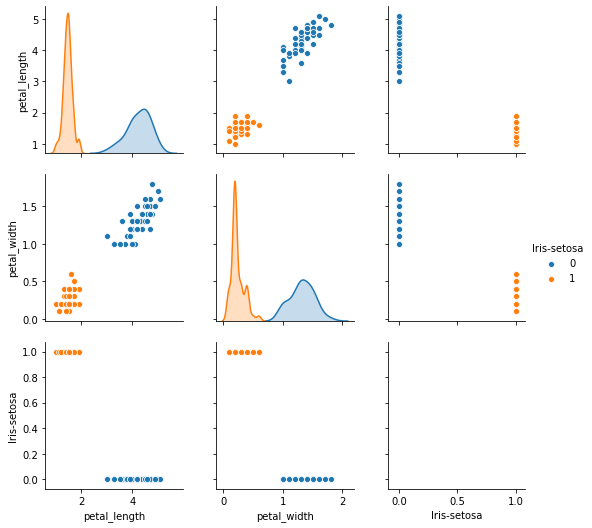

In [716]:
sns.pairplot(flower,hue="Iris-setosa")

In [715]:
flower.columns

Index(['petal_length', 'petal_width', 'Iris-setosa'], dtype='object')